In [1]:
# May 16, 2019
# Tran Le Anh - MSc Student in Computer Vision 
# Dept. of Electronics Engineering, Myongji University, South Korea
# tranleanh.nt@gmail.com
# https://sites.google.com/view/leanhtran

In [2]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

In [3]:
filename = 'traindata.dat'
data = pd.read_csv(filename, delimiter=';', header = None)
data = np.asarray(data)

In [4]:
x1 = []
x2 = []
y = []

for i in range (len(data)):
    x1 = np.append(x1, data[i][0])
    x2 = np.append(x2, data[i][1])
    y = np.append(y, data[i][2])

In [5]:
# Display the data
print(x1)
print(x2)
print(y)

[0.7 0.6 0.7 0.7 0.8 0.9 0.7 0.4 0.6 0.6 0.1 0.4 0.5 0.9 0.2 0.1 0.3 0.4
 0.9 0.2 0.5 0.8 0.5 0.2 0.4 0.3 0.8 0.5 0.2 0.9 0.7 0.3 0.4 0.2 0.3 0.7
 0.1 0.5 0.3 0.3 0.6 0.8 0.2 0.9 0.8 0.6 0.4 0.1 0.6 0.7 0.2 0.1 0.5 0.7
 0.6 0.3 0.9 0.2 0.8 0.8 0.1 0.9 0.4 0.5 0.6 0.1 0.3 0.1 0.9 0.1 0.9 0.7
 0.8 0.6 0.4 0.5 0.5 0.3 0.8 0.2 0.4]
[0.6 0.8 0.1 0.3 0.7 0.4 0.9 0.6 0.9 0.3 0.9 0.2 0.8 0.5 0.4 0.8 0.4 0.4
 0.7 0.8 0.4 0.4 0.9 0.6 0.5 0.3 0.8 0.2 0.7 0.1 0.5 0.2 0.3 0.3 0.8 0.8
 0.7 0.6 0.6 0.1 0.5 0.3 0.2 0.3 0.2 0.7 0.1 0.3 0.6 0.2 0.9 0.5 0.3 0.7
 0.4 0.9 0.6 0.1 0.9 0.5 0.2 0.8 0.9 0.1 0.1 0.4 0.5 0.6 0.9 0.1 0.2 0.4
 0.6 0.2 0.7 0.5 0.7 0.7 0.1 0.5 0.8]
[0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0.]


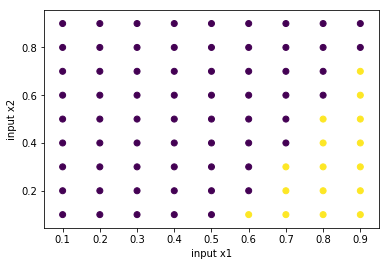

In [6]:
# Visualize the data
plt.scatter(x1, x2, c = y)
plt.xlabel("input x1")
plt.ylabel("input x2")
plt.show()

In [7]:
# Define some subroutines
def sigmoid(x):
    return 1/( 1 + np.exp(-x))

def sigmoid_derivative(matrix):
    return np.multiply(matrix, (np.ones(matrix.shape, dtype = np.uint8) - matrix))

In [8]:
# Define input matrix
X = []

for i in range(len(x1)):
    X_i = [[x1[i]], [x2[i]]]
    X.insert(len(X), X_i)

X = np.asarray(X)

In [9]:
# Define perceptron model
model = [2, 2, 1]       # 2 inputs, 1 hidden layer: 2 notes, 1 output

W = []
B = []

# Initialize weight matrices and bias matrices
for i in range(len(model)-1):
    W_i = np.ones((model[i+1], model[i]), dtype = np.uint8)
    B_i = np.ones((model[i+1], 1), dtype = np.uint8)
    
    W.insert(len(W), W_i)
    B.insert(len(B), B_i)
    
print(W)
print(B)

[array([[1, 1],
       [1, 1]], dtype=uint8), array([[1, 1]], dtype=uint8)]
[array([[1],
       [1]], dtype=uint8), array([[1]], dtype=uint8)]


In [10]:
# Back-Propagation
J = 0
Loss = []
learning_rate = 0.005
num_epochs = 50
for e in range(num_epochs):
    J = 0
    for i in range(len(X)):
        S1 = np.dot(W[0], X[i]) + B[0]
        A1 = sigmoid(S1)
        S2 = np.dot(W[1], A1) + B[1]
        y_hat = sigmoid(S2)[0]

        # Update weights and biases
        B[1] = B[1] - learning_rate*(y_hat - y[i])
        W[1] = W[1] - learning_rate*A1.transpose()*(y_hat - y[i])

        B[0] = B[0] - learning_rate*np.multiply(W[1].transpose(), sigmoid_derivative(A1))*(y_hat - y[i])
        W[0] = W[0] - learning_rate*np.dot(np.multiply(W[1].transpose(), sigmoid_derivative(A1)), X[i].transpose())*(y_hat - y[i])

        L = -(y[i]*np.log(y_hat) + (1 - y[i])*np.log(1 - y_hat))
        J += L

    Loss = np.append(Loss, J)

In [11]:
Loss = np.asarray(Loss)
print(Loss)

[161.71166928 123.00549779  93.58649766  73.49541185  60.83005833
  53.14784174  48.51222384  45.67864659  43.91218236  42.78814189
  42.05926421  41.57878547  41.25758543  41.04031447  40.8918775
  40.7896095   40.71863737  40.66906633  40.6342362   40.60961944
  40.5921126   40.57957352  40.57051509  40.56390011  40.5590024
  40.55531212  40.55247051  40.55022477  40.54839664  40.54686042
  40.54552752  40.54433559  40.54324087  40.54221273  40.54122982
  40.54027735  40.53934517  40.53842635  40.53751626  40.53661185
  40.53571114  40.53481294  40.53391654  40.53302159  40.53212794
  40.53123562  40.53034469  40.52945532  40.52856765  40.52768186]


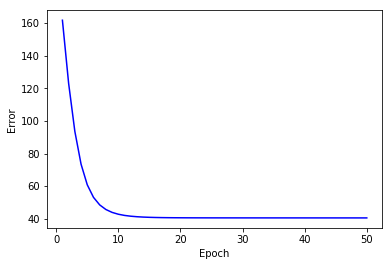

In [12]:
# Create count of the number of epochs
epoch_count = range(1, num_epochs + 1)

# Visualize Loss
plt.plot(epoch_count, Loss, 'b-')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.show()